<IPython.core.display.Javascript object>


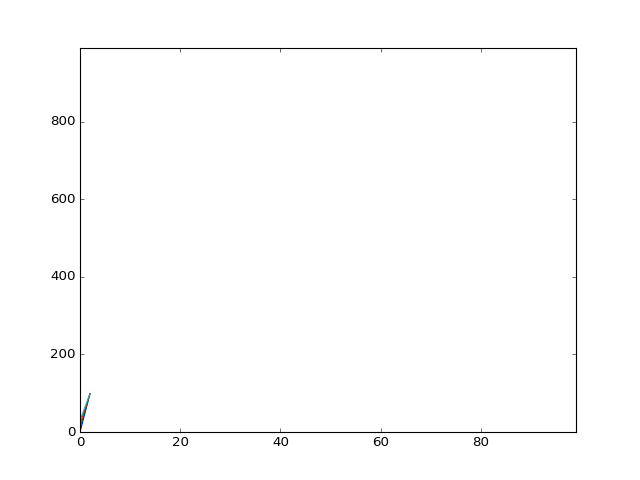

In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation
import time
import random
%matplotlib notebook

fig = plt.figure()

ax = plt.gca()

N = 4
lines = [plt.plot([], [])[0] for _ in range(N)] #lines to animate

def init():
    #init lines
    for line in lines:
        line.set_data([], [])
    return lines #return everything that must be updated

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data([0, 2], [10 * j,i])
    ax.set_xlim(0,i)
    ax.set_ylim(0,10*i)

    return lines #return everything that must be updated

anim = matplotlib.animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True, repeat=False)

plt.show()

<IPython.core.display.Javascript object>


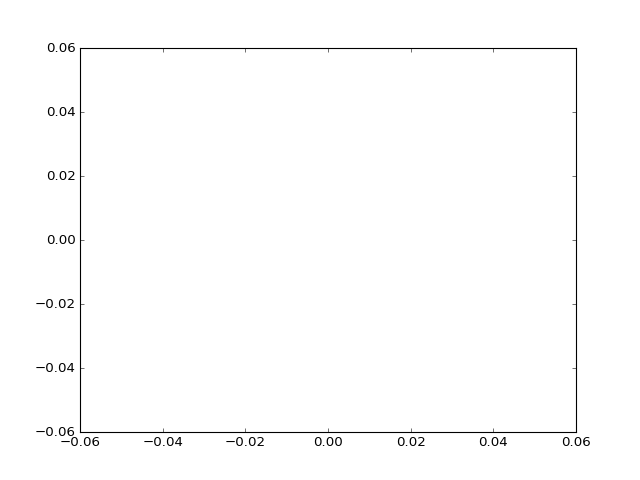

In [5]:
import update_test_data as utd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation
import time
import random
%matplotlib notebook

sensor_axes = 3
total_num_samples = 4

start_time = dt.datetime.now()
num_sample_lines = [0]*total_num_samples
num_sample = 0

fig = plt.figure()
ax = plt.gca()
lines = [plt.plot([], [])[0] for _ in range(sensor_axes)] #lines to animate

def generate_frame():
    a=0
    while True:
        yield a
        
def init():
    #init lines
    for line in lines:
        line.set_data([], [])
    return lines #return everything that must be updated
        
def update(i):
    try:
        global num_sample
        global start_time
        global num_sample_lines
        start_time, left_accel, _, _ = utd.get_new_batch(start_time)
        if num_sample == 0:
            num_lines = len(left_accel)
            num_sample_lines[num_sample] = num_lines
            lines[0].set_data(num_lines, left_accel[:,1])
            lines[1].set_data(num_lines, left_accel[:,2])
            lines[2].set_data(num_lines, left_accel[:,3])
            num_sample += 1
        elif num_sample < total_num_samples:
            num_lines = len(left_accel)
            num_sample_lines[num_sample] = num_lines
            y1_data=lines[0].get_ydata()
            y1_data.append(left_accel[:,1])
            y2_data=lines[1].get_ydata()
            y2_data.append(left_accel[:,2])
            y3_data=lines[2].get_ydata()
            y3_data.append(left_accel[:,3])
            lines[0].set_data(len(y1_data), y1_data)
            lines[1].set_data(len(y2_data), y2_data)
            lines[2].set_data(len(y3_data), y3_data)
            num_sample += 1
        else:
            num_lines = len(left_accel)
            num_sample_lines.append(num_lines)
            y1_data=lines[0].get_ydata()[num_sample_lines[0]:]
            y1_data.append(left_accel[:,1])
            y2_data=lines[1].get_ydata()[num_sample_lines[0]:]
            y2_data.append(left_accel[:,2])
            y3_data=lines[2].get_ydata()[num_sample_lines[0]:]
            y3_data.append(left_accel[:,3])
            lines[0].set_data(len(y1_data), y1_data)
            lines[1].set_data(len(y2_data), y2_data)
            lines[2].set_data(len(y3_data), y3_data)
            num_sample_lines = num_sample_lines[1:]
        ax.set_xlim(0,len(lines[0].get_ydata()))
        ax.set_ylim(0,100)
    except:
        print("I got an error")
    
ani= matplotlib.animation.FuncAnimation(fig, update, frames=generate_frame, init_func=init,
                                       interval=4000, blit=True, repeat=False)

plt.show()